# Loading and Inspecting the Data

Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\usman\AppData\Local\Temp\ipykernel_24800\2434480854.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Loading the data

In [2]:
# Data sourced from Kaggle - https://www.kaggle.com/datasets/asinow/car-price-dataset
data = pd.read_csv("car_price_dataset.csv")

Let's inspect the data: All the data types seem to make sense. We have 10000 entries. We have 10 columns. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
data.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [5]:
data.describe(include="all")

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
count,10000,10000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.00000
unique,10,30,NaN,NaN,4,3,NaN,NaN,NaN,NaN
top,Ford,Accord,NaN,NaN,Electric,Manual,NaN,NaN,NaN,NaN
freq,1048,365,NaN,NaN,2625,3372,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.543700,3.000560,NaN,NaN,149239.111800,3.497100,2.991100,8852.96440
std,NaN,NaN,6.897699,1.149324,NaN,NaN,86322.348957,1.110097,1.422682,3112.59681
min,NaN,NaN,2000.000000,1.000000,NaN,NaN,25.000000,2.000000,1.000000,2000.00000
25%,NaN,NaN,2006.000000,2.000000,NaN,NaN,74649.250000,3.000000,2.000000,6646.00000
50%,NaN,NaN,2012.000000,3.000000,NaN,NaN,149587.000000,3.000000,3.000000,8858.50000
75%,NaN,NaN,2017.000000,4.000000,NaN,NaN,223577.500000,4.000000,4.000000,11086.50000


Let's check for missing values. Looks like we have no missing values

In [6]:
data.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

# Data Preprocessing and Feature Engineering

Let's inspect the features

In [7]:
# Computing the correlation matrix 
correlation_matrix = data.corr(numeric_only="True")

correlation_matrix

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
Year,1.000000,-0.001306,-0.002476,0.014867,0.000116,0.663036
Engine_Size,-0.001306,1.000000,0.015135,-0.009844,0.007122,0.357403
Mileage,-0.002476,0.015135,1.000000,0.007879,0.006287,-0.551227
Doors,0.014867,-0.009844,0.007879,1.000000,-0.005431,0.000511
Owner_Count,0.000116,0.007122,0.006287,-0.005431,1.000000,0.002656
Price,0.663036,0.357403,-0.551227,0.000511,0.002656,1.000000


Let's visualise the correlation matrix using a heatmap

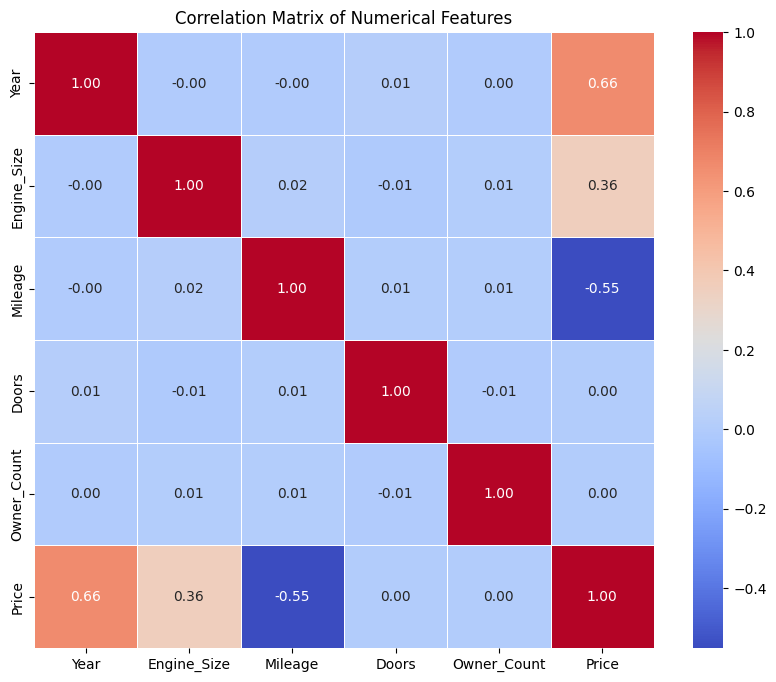

In [8]:
# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Here is what we can conclude: For the target 'price', 'mileage' and 'year' could be decent predictors as they have moderate negative and postive corelation, respectively. This is expected as newer cars are generally more expensive and higher mileage reduces the value of a car. 

'Engine_size' seems to have weak correlation with 'price'.

The other predictors like 'Doors' and 'Owner_Count' have very poor correlation and most likely might not be good predictors. 

There are no multicollinearity issues either as no predictor is highly correlated with another. 

Let's drop 'Doors' and 'Owner_Count' as they seem like poor predictors 

In [9]:
data = data.drop(['Doors', 'Owner_Count'], axis=1)

In [10]:
data.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,6545


Let's inspect how many unique values each of the categorical variables have

In [11]:
data['Brand'].nunique()

10

In [12]:
data['Model'].nunique()

30

In [13]:
data['Fuel_Type'].nunique()

4

In [14]:
data['Transmission'].nunique()

3

Since 'Fuel_Type' and 'Transmission' have relatively less categories, we can use one hot encoding

In [15]:
data = pd.get_dummies(data, columns=['Fuel_Type', 'Transmission'])

To avoid the dummy variable trap, let's drop one category from each feature.

In [16]:
data = data.drop(columns=['Fuel_Type_Petrol', 'Transmission_Manual'])

We have done the encoding but the data types are wrong now. They are booleans we need to convert them to integers. 

In [17]:
data['Fuel_Type_Diesel'] = data['Fuel_Type_Diesel'].astype('int64')
data['Fuel_Type_Electric'] = data['Fuel_Type_Electric'].astype('int64')
data['Fuel_Type_Hybrid'] = data['Fuel_Type_Hybrid'].astype('int64')

In [18]:
data.head()

,Brand,Model,Year,Engine_Size,Mileage,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Transmission_Automatic,Transmission_Semi-Automatic
0,Kia,Rio,2020,4.2,289944,8501,1,0,0,False,False
1,Chevrolet,Malibu,2012,2.0,5356,12092,0,0,1,True,False
2,Mercedes,GLA,2020,4.2,231440,11171,1,0,0,True,False
3,Audi,Q5,2023,2.0,160971,11780,0,1,0,False,False
4,Volkswagen,Golf,2003,2.6,286618,2867,0,0,1,False,True


In [19]:
data['Transmission_Automatic'] = data['Transmission_Automatic'].astype('int64')
data['Transmission_Semi-Automatic'] = data['Transmission_Semi-Automatic'].astype('int64')

In [20]:
data.head()

,Brand,Model,Year,Engine_Size,Mileage,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Transmission_Automatic,Transmission_Semi-Automatic
0,Kia,Rio,2020,4.2,289944,8501,1,0,0,0,0
1,Chevrolet,Malibu,2012,2.0,5356,12092,0,0,1,1,0
2,Mercedes,GLA,2020,4.2,231440,11171,1,0,0,1,0
3,Audi,Q5,2023,2.0,160971,11780,0,1,0,0,0
4,Volkswagen,Golf,2003,2.6,286618,2867,0,0,1,0,1


Now we need to encode 'Brand' and 'Model'. Since brand and model have so many categories, we can use label encoding. 

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Brand'] = label_encoder.fit_transform(data['Brand'])

In [22]:
data.head()

,Brand,Model,Year,Engine_Size,Mileage,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Transmission_Automatic,Transmission_Semi-Automatic
0,6,Rio,2020,4.2,289944,8501,1,0,0,0,0
1,2,Malibu,2012,2.0,5356,12092,0,0,1,1,0
2,7,GLA,2020,4.2,231440,11171,1,0,0,1,0
3,0,Q5,2023,2.0,160971,11780,0,1,0,0,0
4,9,Golf,2003,2.6,286618,2867,0,0,1,0,1


In [23]:
data['Brand'].unique()

array([6, 2, 7, 0, 9, 8, 4, 1, 5, 3])

In [24]:
data['Model'] = label_encoder.fit_transform(data['Model'])

In [25]:
data.head()

,Brand,Model,Year,Engine_Size,Mileage,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Transmission_Automatic,Transmission_Semi-Automatic
0,6,24,2020,4.2,289944,8501,1,0,0,0,0
1,2,19,2012,2.0,5356,12092,0,0,1,1,0
2,7,16,2020,4.2,231440,11171,1,0,0,1,0
3,0,22,2023,2.0,160971,11780,0,1,0,0,0
4,9,17,2003,2.6,286618,2867,0,0,1,0,1


In [26]:
data['Model'].unique()

array([24, 19, 16, 22, 17,  7,  8, 26, 23,  1,  6, 11, 27, 12, 13,  2,  0,
       28, 21, 18,  9, 20, 14,  3, 15, 10, 25,  5, 29,  4])

Now we we need to consider feature scaling/normalisation. The numerical features have varying ranges with Mileage having the largest range. This could lead to Mileage dominating any future models that we build. Let's scale the 'features':

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[['Year', 'Engine_Size', 'Mileage']] = sc.fit_transform(data[['Year', 'Engine_Size', 'Mileage']])

In [28]:
data.head(20)

,Brand,Model,Year,Engine_Size,Mileage,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Transmission_Automatic,Transmission_Semi-Automatic
0,6,24,1.226021,1.043657,1.630075,8501,1,0,0,0,0
1,2,19,0.066156,-0.870607,-1.666895,12092,0,0,1,1,0
2,7,16,1.226021,1.043657,0.952303,11171,1,0,0,1,0
3,0,22,1.660970,-0.870607,0.135915,11780,0,1,0,0,0
4,9,17,-1.238692,-0.348535,1.591543,2867,0,0,1,0,1
5,8,7,-0.658760,-0.261523,0.100210,7242,0,0,0,1,0
6,4,8,-0.223810,0.347561,-0.111855,11208,0,1,0,1,0
7,6,26,-1.528659,1.478717,0.095645,7950,0,1,0,0,1
8,6,26,0.356122,-0.348535,-0.585499,9926,0,0,1,0,0
9,8,23,-0.948726,0.086525,-0.480955,6545,0,0,0,0,0


In [29]:
data[['Year', 'Engine_Size', 'Mileage']].describe()

,Year,Engine_Size,Mileage
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,8.074608e-15,2.842171e-16,-1.548983e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.673642e+00,-1.740728e+00,-1.728655e+00
25%,-8.037430e-01,-8.706074e-01,-8.641284e-01
50%,6.615581e-02,-4.872673e-04,4.030307e-03
75%,7.910715e-01,8.696329e-01,8.612150e-01
max,1.660970e+00,1.739753e+00,1.745961e+00


So above, we use StandardScaler to scale our numerical features that have varying ranges of values. This results in each of these features having a mean of 0 and standard deviation of 1. To confirm this we use data.describe() and we can see that there are no issues. There are no extreme values either (max and min) so we are ready to move on. 

# Split the Data

In [30]:
from sklearn.model_selection import train_test_split

# Getting the matrix of features and dependent variable (target) vector
X = data.drop(['Price'], axis=1) 
y = data['Price']

In [31]:
X

,Brand,Model,Year,Engine_Size,Mileage,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Transmission_Automatic,Transmission_Semi-Automatic
0,6,24,1.226021,1.043657,1.630075,1,0,0,0,0
1,2,19,0.066156,-0.870607,-1.666895,0,0,1,1,0
2,7,16,1.226021,1.043657,0.952303,1,0,0,1,0
3,0,22,1.660970,-0.870607,0.135915,0,1,0,0,0
4,9,17,-1.238692,-0.348535,1.591543,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,6,20,-1.093709,0.608597,-1.661821,1,0,0,0,1
9996,2,18,-1.383676,-1.392679,0.217346,0,1,0,1,0
9997,1,0,-0.223810,-0.000487,-0.724937,0,0,0,1,0
9998,3,13,-1.383676,-1.392679,0.886638,0,0,1,1,0


In [32]:
y

0        8501
1       12092
2       11171
3       11780
4        2867
        ...  
9995     8884
9996     6240
9997     9866
9998     4084
9999     3342
Name: Price, Length: 10000, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We created our matrix of features and dependent variable vector. And then we used train_test_split to split the dataset using 80/20 ratio. We have also implemented a random_state in case we need to reproduce results. 

# Training The Model - Linear Regression 

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_hat = lr.predict(X_test)

In [36]:
y_test

6252     2000
4684    11164
1731    14630
4742     7334
4521    10127
        ...  
6412     4681
8285    12839
7853     8124
1095     6709
6929    11855
Name: Price, Length: 2000, dtype: int64

In [37]:
y_hat

array([ 1695.41502806, 11156.24167924, 14598.06529269, ...,
        8136.03499411,  6726.92797727, 11839.73400247])

# Evaluating The Model - Linear Regression 

We've trained and fitted the model and we've made predictions. Before we look at some evaluation metrics, let's visualise the actual prices vs the predicted prices. 

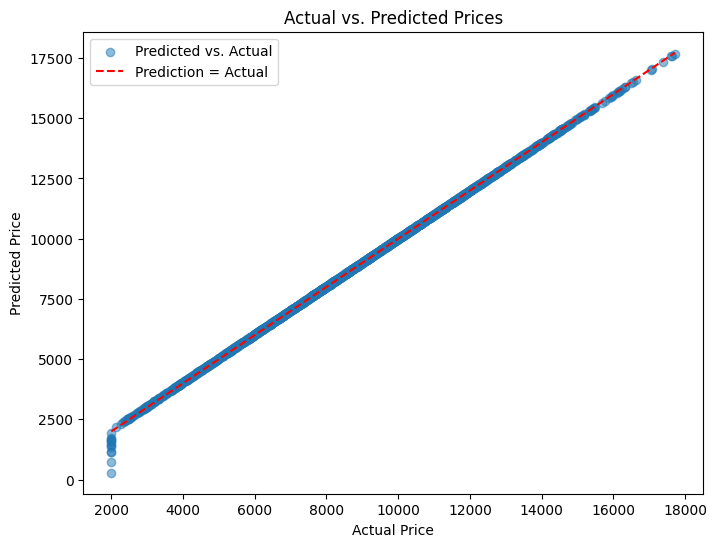

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_hat, alpha=0.5, label="Predicted vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', linestyle='--', label="Prediction = Actual")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.show()

In the above plot, we have a red line y = x meant to visualise when the predictions exactly equal the actual prices. Overall, we can see majority of the points lie very close to this line hence, the model's predictions are very accurate. Let's derive some metrics and confirm the performance of the model. 

In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
rmse = sqrt(mean_squared_error(y_test, y_hat))

In [40]:
r2

0.9995456425409295

In [41]:
mse

4174.550846002392

In [42]:
mae

19.42589196912529

In [43]:
rmse

64.61076416513266

Looking at the above metrics, we have an r^2 value of approximately 0.9995. This means that about 99.95% of the variance in the target variable (Price) is explained by the model. Which means the model fits the data exceptionally well. 

Looking at the MSE, 4174 may seem high but given the that prices range up to 17000-18000, this seems fairly reasonable. 

The MAE is 19.42 meanining the average absolute difference between the predictions and actual prices is about 19.42 which once again suggests high performance. 

The RMSE is approximately 64.61 given the range of the prices, this is a very reasonable result indicating strong performance once again.

Let's look at a plot of the residuals.

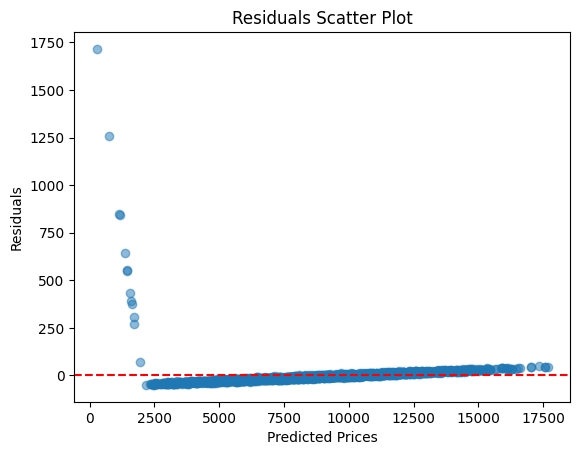

In [ ]:
res = y_test - y_hat

plt.scatter(y_hat, res, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals Scatter Plot")

plt.show()

Let's look at the QQ plot.

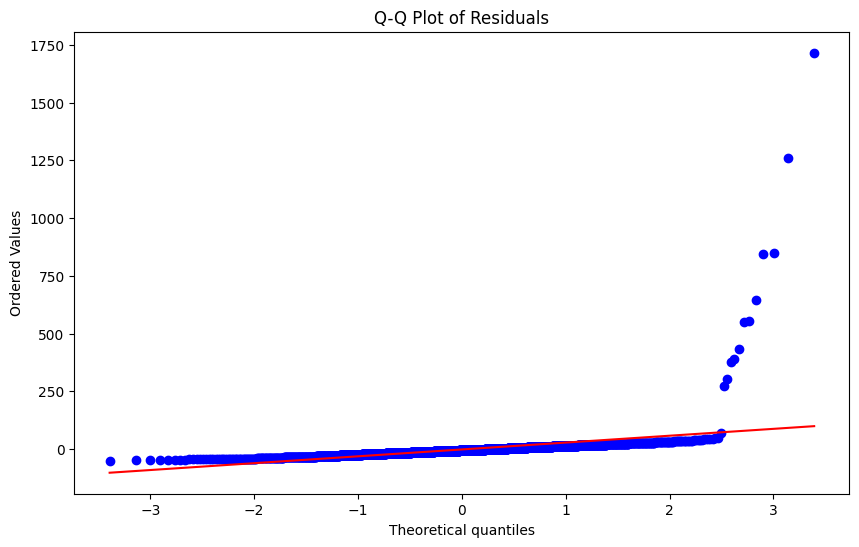

In [45]:
import scipy.stats as st

plt.figure(figsize=(10,6))
st.probplot(res, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Firstly looking at the scatter plot for residuals, it's evident that there are large residuals for lower predicted values. The spread of residuals is not exactly uniform, with higher variance for lower price predictions.

Looking the QQ-Plot, the points deviate significantly at the right side, which suggests heavy-tailed residuals or potential outliers.This indicates that the residuals are not perfectly normally distributed, which might suggest some systematic errors in the model.

Let's check for multicollinearity.

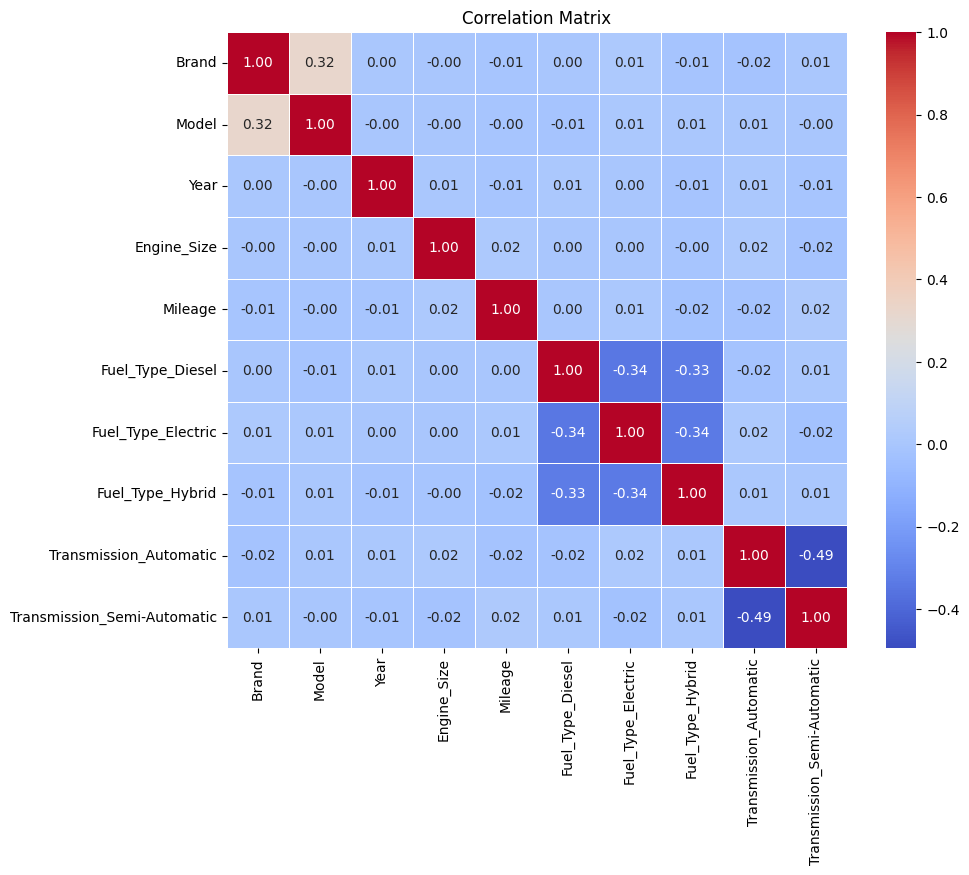

In [46]:
X_train_corr = X_train.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(X_train_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

So it seems most of the variables are not highly correlated with each other. Although 'Transmission_Automatic' and 'Transmission_Semi-Automatic' seem to have a moderate correlation. Let's dive deeper into this by looking at the VIF for each of the features:

In [47]:
import statsmodels.api as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_copy = X_train.copy()
X_train_copy = sp.add_constant(X_train_copy)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [48]:
vif_data

,Feature,VIF
0,Brand,3.317034
1,Model,3.563975
2,Year,1.000433
3,Engine_Size,1.000401
4,Mileage,1.001361
5,Fuel_Type_Diesel,1.611971
6,Fuel_Type_Electric,1.645761
7,Fuel_Type_Hybrid,1.602979
8,Transmission_Automatic,1.696146
9,Transmission_Semi-Automatic,1.689889


So as we can see after analysing and visualising both the correlation matrix and variance inflation factor we can see there no major multicollinearity issues. More specifically, the VIF for all features is < 5 which is quite acceptable. 

It's evident that the current Multiple Linear Regression Model works quite accurately. However, let's experiment with and test out other models before we move onto picking one model and fine tuning it. 

# Testing Other Models - Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [50]:
y_hat_rf = rf.predict(X_test)

Let's calculate the same metrics to evaluate the model.

In [51]:
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)
mae_rf = mean_absolute_error(y_test, y_hat_rf)
rmse_rf = sqrt(mean_squared_error(y_test, y_hat_rf))

In [52]:
r2_rf

0.9891054916945043

In [53]:
mse_rf

100096.69249520001

In [54]:
mae_rf

246.25254

In [55]:
rmse_rf

316.3806133365317

Let's compare the two models:

In [56]:
metrics = {"MLR": [r2,mse,mae,rmse], "RFR": [r2_rf,mse_rf,mae_rf,rmse_rf]}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=["r2","mse","mae","rmse"])

In [57]:
metrics_df

,r2,mse,mae,rmse
MLR,0.999546,4174.550846,19.425892,64.610764
RFR,0.989105,100096.692495,246.252540,316.380613


So it is quite evident, that the Multiple Linear Regression model is currently better than the random_forest regression model. The large value for RMSE could be indicative of the fact the RFR model is overfitting. But let's visualise the predicted vs actual prices:

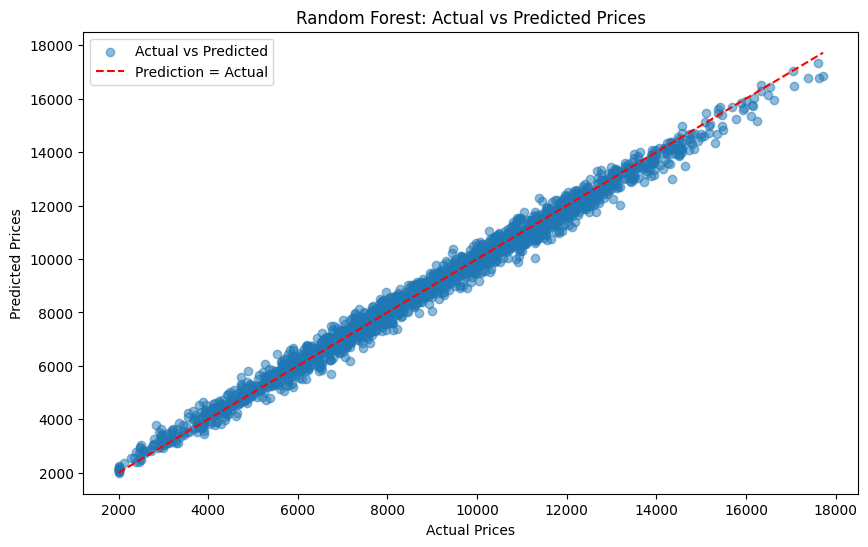

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_rf, alpha=0.5, label="Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', linestyle='--', label="Prediction = Actual")

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')

plt.legend()
plt.show()

Let's visualise the residuals:

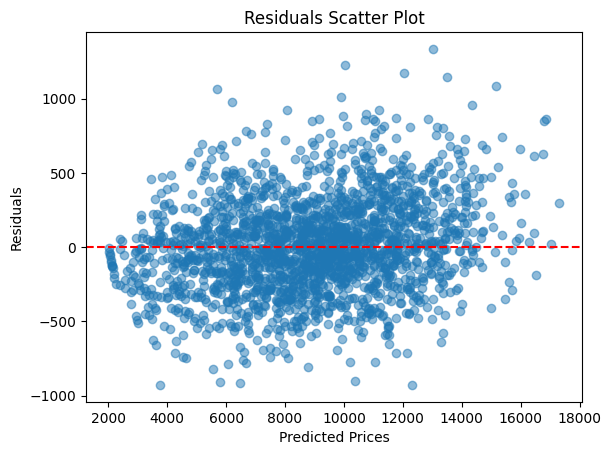

In [59]:
res_rf = y_test - y_hat_rf

plt.scatter(y_hat_rf, res_rf, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Adds a horizontal line at y=0 for reference

plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals Scatter Plot")

plt.show()

As we can see, the residuals seem more normalised and randomly spread out compared to the MLR model. I think this makes the RFR model quite promising. 


However, let's inspect the QQ Plot. 

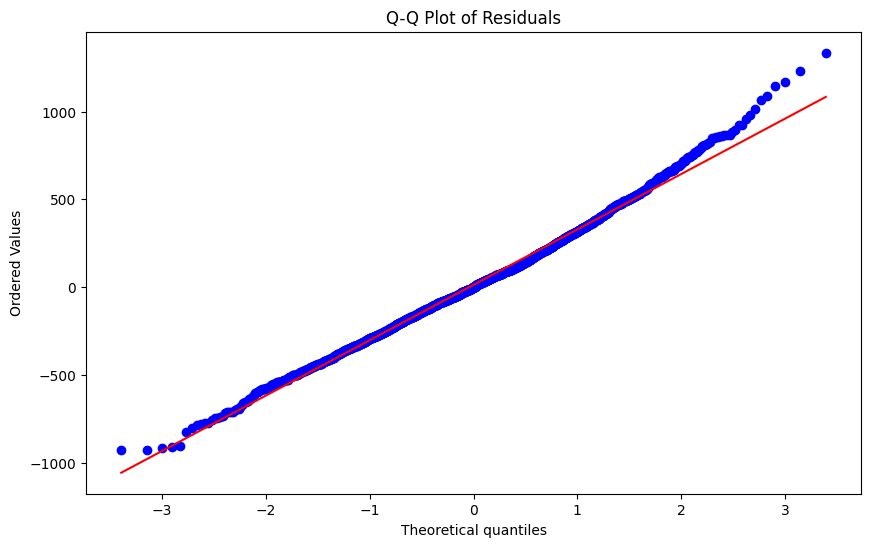

In [60]:
plt.figure(figsize=(10,6))
st.probplot(res_rf, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

So I would say the QQ Plot also further shows that the residuals are quite normalised however, there is some deviation at either ends. 

# Testing Other Models - Gradient Boost Regression

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [63]:
y_hat_gbr = gbr.predict(X_test)

As usual, let's visual the actual prices vs predicted prices.

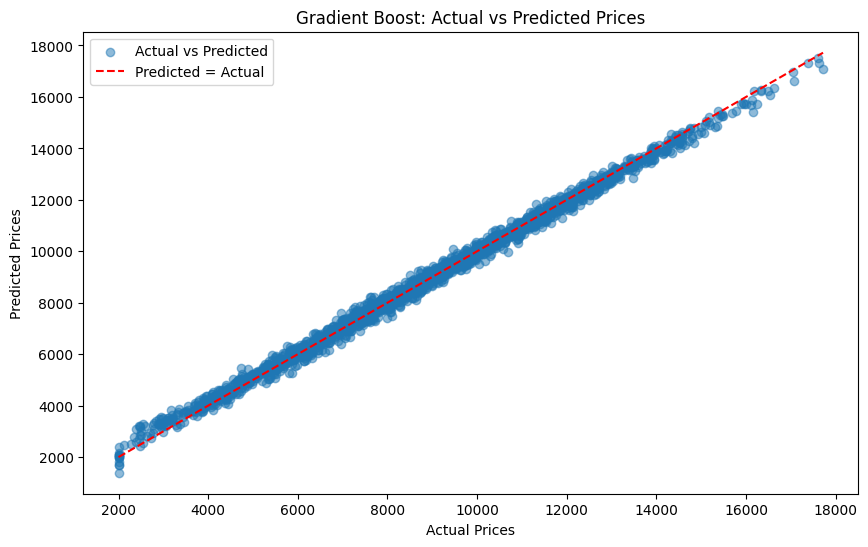

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_gbr, alpha=0.5, label="Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', linestyle='--', label="Predicted = Actual")

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boost: Actual vs Predicted Prices')

plt.legend()
plt.show()

Similar to the previous models, it seems the gradient boost regression model performs quite well too. However, let's look at the metrics to evaluate the model further.

In [65]:
r2_gbr = r2_score(y_test, y_hat_gbr)
mse_gbr = mean_squared_error(y_test, y_hat_gbr)
mae_gbr = mean_absolute_error(y_test, y_hat_gbr)
rmse_gbr = sqrt(mean_squared_error(y_test, y_hat_gbr))

In [66]:
r2_gbr

0.9949366760231649

In [67]:
mse_gbr

46520.86802826796

In [68]:
mae_gbr

169.0050284736474

In [69]:
rmse_gbr

215.68696768295473

Let's add these results to our table of metrics and compare.

In [70]:
metrics = {"MLR": [r2,mse,mae,rmse], "RFR": [r2_rf,mse_rf,mae_rf,rmse_rf], "GBR":[r2_gbr,mse_gbr,mae_gbr,rmse_gbr]}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=["r2","mse","mae","rmse"])

In [71]:
metrics_df

,r2,mse,mae,rmse
MLR,0.999546,4174.550846,19.425892,64.610764
RFR,0.989105,100096.692495,246.252540,316.380613
GBR,0.994937,46520.868028,169.005028,215.686968


Looking at the above metrics, it's apparent that the MLR model is more accurate out of the others. However, I'm not satisfied with what I saw on the QQ-Plot and Residual Plot for the MLR model. So I'm gonna for the next most accurate model and that is GBR. 

# Fine-Tuning The Model - Hyperparameter Tuning

So we have chosen to go with the GBR model. Let's try to optimise it using hyperparameter tuning. 

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = {
    'n_estimators': [100,300,500],
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3,5,7], 
    'subsample': [0.7,0.8,1.0]
}

In [74]:
grid_gbr = GradientBoostingRegressor(random_state=42)
gs = GridSearchCV(grid_gbr, parameters, cv=5, scoring="r2", n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='r2')

In [75]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}

Now that we have found the optimal hyperparameters, let's train the GBR model with those hyperparameters and evaluate.

In [76]:
tuned_gbr = GradientBoostingRegressor(**gs.best_params_ , random_state=42)
tuned_gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500, random_state=42, subsample=0.8)

In [77]:
y_hat_tuned_gbr = tuned_gbr.predict(X_test)

Let's visualise the predictions vs the actual prices now. 

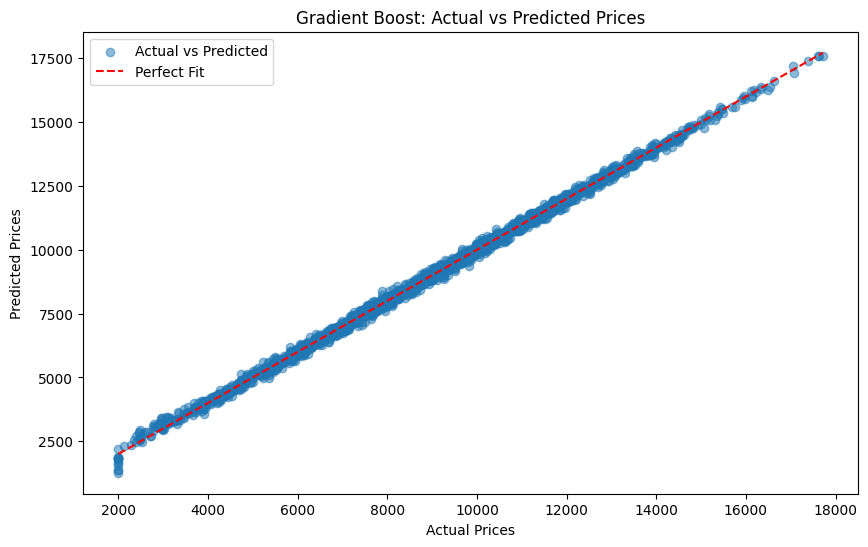

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_tuned_gbr, alpha=0.5, label="Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', linestyle='--', label="Perfect Fit")

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boost: Actual vs Predicted Prices')

plt.legend()
plt.show()

The points don't seem as spread out anymore which is indicative that the predictions are close to the actual prices. 

Let's look at the metrics.

In [79]:
r2_tuned_gbr = r2_score(y_test, y_hat_tuned_gbr)
mse_tuned_gbr = mean_squared_error(y_test, y_hat_tuned_gbr)
mae_tuned_gbr = mean_absolute_error(y_test, y_hat_tuned_gbr)
rmse_tuned_gbr = sqrt(mean_squared_error(y_test, y_hat_tuned_gbr))

In [80]:
r2_tuned_gbr

0.9980103291081556

In [81]:
mse_tuned_gbr

18280.721795139667

In [82]:
mae_tuned_gbr

105.56445304791734

In [83]:
rmse_tuned_gbr

135.20621951352558

Let's add these metrics to our table and compare.

In [84]:
metrics = {"MLR": [r2,mse,mae,rmse], "RFR": [r2_rf,mse_rf,mae_rf,rmse_rf], "GBR":[r2_gbr,mse_gbr,mae_gbr,rmse_gbr], "GBR_TUNED":[r2_tuned_gbr,mse_tuned_gbr,mae_tuned_gbr,rmse_tuned_gbr]}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=["r2","mse","mae","rmse"])

In [85]:
metrics_df

,r2,mse,mae,rmse
MLR,0.999546,4174.550846,19.425892,64.610764
RFR,0.989105,100096.692495,246.252540,316.380613
GBR,0.994937,46520.868028,169.005028,215.686968
GBR_TUNED,0.998010,18280.721795,105.564453,135.206220


# Final Thoughts

So after training and evaluating different models here is what I conclude:

Even after fine-tuning the GBR model, the MLR model is more accurate. This probably means the data is best fit for a linear model. As such, the other models such as RFR and GBR are too complex and would work better with data that has non-linear trends. As such, I would most likely go back and tune the MLR model and see if the performance and reliability could be improved.  